<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK03_Datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12-1**

# **datetime 오브젝트**
- datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능 제공
- 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간 모두 처리하는 datetime 오브젝트가 포함되어 있음

**datetime 오브젝트 사용하기**

1. datetime 오브젝트 사용을 위한 라이브러리 불러오기

In [2]:
from datetime import datetime

2. now, today 메서드를 사용하면 아래와 같이 현재 시간 출력 가능

In [3]:
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2025-09-19 08:44:07.707363
2025-09-19 08:44:07.707502


3. 아래는 datetime 오브젝트를 생성할 때 시간을 직접 입력해 인자로 전달한 것으로 입력한 시간을 바탕으로 datetime 오브젝트 생성

In [4]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2025-09-19 08:44:07.723467
1970-01-01 00:00:00
1970-12-12 13:24:34


4. datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산이 가능하다는 점

In [5]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

diff2 = t2 - t1

print(diff2)
print(type(diff2))

20350 days, 8:44:07.723467
<class 'datetime.timedelta'>
-20351 days, 15:15:52.276533
<class 'datetime.timedelta'>


**< datetime 오브젝트로 변환하기 - to_datetime 메서드 >**

- 시계열 데이터를 문자열로 저장해야할 때도 있음
- 하지만 문자열은 시간 계산이 불가능하기에 datetime 오브젝트로 변환해주어야 함

**문자열을 datetime 오브젝트로 변환하기**

1. ebola 데이터 집합 불러오기

In [6]:
import pandas as pd
import os

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv')

2. ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있음

In [9]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환 가능
- 아래는 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한 것

In [10]:
ebola['data_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음

In [11]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})
print(test_df1)

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day
0  01/01/15
1  02/01/15
2  03/01/15
  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [12]:
test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})
print(test_df2)

test_df2['date_dt2'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day
0  01-01-15
1  02-01-15
2  03-01-15
  order_day   date_dt2
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


**시간 형식 지정자**

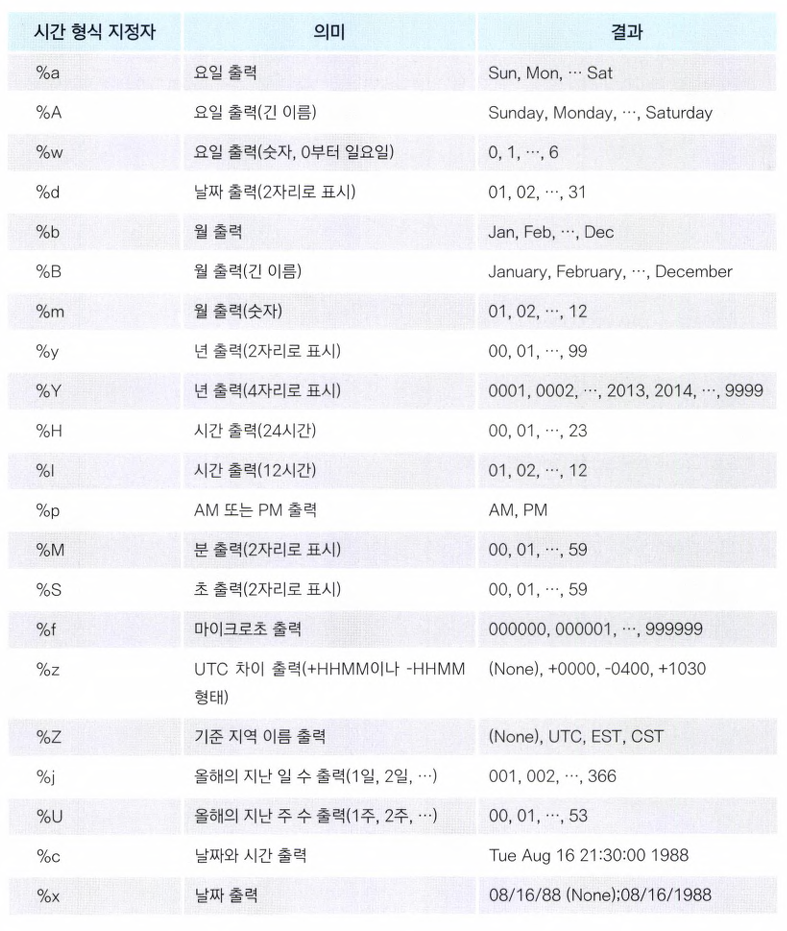

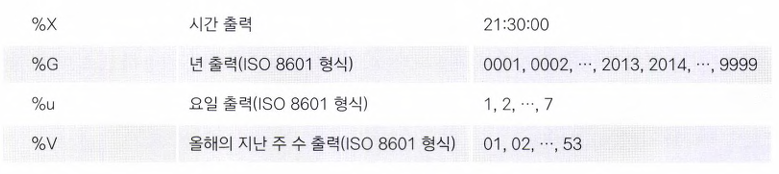

**+ 시계열 데이터 구분해서 추출**
- now 메서드로 얻은 현재 시간의 시계열 데이터는 매우 정밀한 단위까지 시간 표현
- 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 함
- 아래는 strftime 메서드와 시간 형식 지정자를 이용해 시계열 데이터를 잘라낸 것

In [13]:
now = datetime.now()
print(now)

nowDate = now.strftime('%y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDateTime = now.strftime('%y-%m-%d %H:%M:%S')
print(nowDateTime)

2025-09-19 08:44:47.234047
25-09-19
08:44:47
25-09-19 08:44:47


**< datetime 오브젝트로 변환하기 - read_csv >**

- 앞에서는 to_datetime 메서드를 이용해 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환함
- 하지만 datetime 오브젝트로 변환하려는 열을 "지정"해 데이터를 물러오는 것이 더 간단함

**datetime 오브젝트로 변환하려는 열을 지정하여 데이터 불러오기**

1. 다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달해 데이터 집합을 불러온 것
- 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트인 것 확인 가능

In [14]:
ebola1 = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

**< datetime 오브젝트에서 날짜 정보 추출하기 >**

- datetime 오브젝트에는 년, 월, 일과 같은 날자 정보를 따로 저장하고 있는 속성이 이미 준비되어 있음

1. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [16]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
# Series = 값과 인덱스를 함께 가지는 객체 / 엑셀의 한 column으로 생각하면 됨
print(date_series)
d1 = pd.to_datetime(date_series)
print(d1)

0    2018-05-16
1    2018-05-17
2    2018-05-18
dtype: object
0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보 바로 추출 가능

In [17]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


**< dt 접근자 사용하기 >**

- 문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했음
- datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터 처리 가능

**dt 접근자로 시계열 데이터 정리하기**

1. ebola의 Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가

In [18]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출

In [19]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [20]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


3. 과정 2번과 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편
- 아래는 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용해 연도값 추출한 것
- 추출한 연도 값은 ebola 데이터프레임의 새로운 열(year)로 추가

In [21]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola['year'])
print(ebola[['Date', 'date_dt', 'year']].head())

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: year, Length: 122, dtype: int32
         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. 과정 3을 응용해 월, 일 데이터를 한번에 추출해 새로운 열(month, day)로 추가

In [22]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. 아래는 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형 출력한 것
- date_dt 열은 datetime 오브젝트이고 나머지는 정수형이라는 것을 알 수 있음

In [24]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# **12-2**

# **사례별 시계열 데이터 계산하기**

**에볼라 최초 발병일 계산하기**

1.